<a href="https://colab.research.google.com/github/dnyaneshwari12383/DeepLearning_1/blob/main/Deepl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

#Step 1 - Data Ingestion

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


1.AT - Atmospheric Temperature
2.V - Vaccum Pressure
3.AP - Atmospheric Pressure
4.RH - Relative Humidity
5.PE - Powerplant output in MW (Target)
#Step 2- Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [5]:
df.duplicated().sum()

41

In [6]:
# Remove the duplicate values
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


#Step 3 - Seperate X and Y(PE)

In [7]:
X = df.drop(columns = ["PE"])
Y = df[["PE"]]

In [8]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


#Step 4 - Apply preprocessing on X

In [10]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


#Step 4 - Apply train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [15]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [16]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [17]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [18]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [19]:
xtrain.shape

(7621, 4)

In [20]:
xtest.shape

(1906, 4)

In [21]:
xtrain.shape[1]

4

#Step 5 - Training the neural network


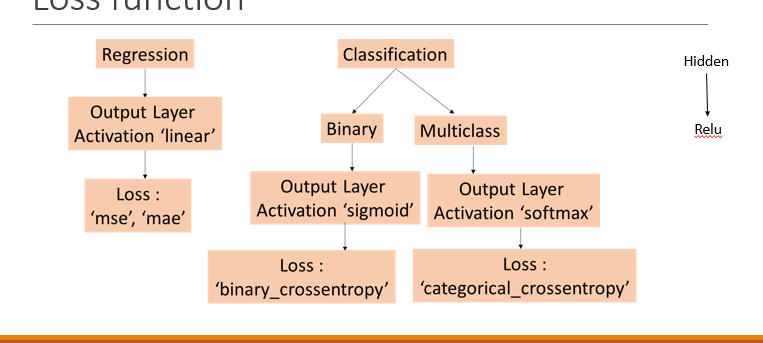

In [22]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [23]:
# Initialize the neural network
model = Sequential()

# Create an input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Create a hidden layer 1
model.add(Dense(units=8, activation="relu"))

# Create a hidden layer 2
model.add(Dense(units=4, activation="relu"))

# Create a output layer
model.add(Dense(units=1, activation="linear"))




In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [26]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 205706.8125 - mae: 453.2347 - val_loss: 201685.7344 - val_mae: 448.7941
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 200171.3438 - mae: 447.1040 - val_loss: 186466.6094 - val_mae: 431.5249
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180644.7812 - mae: 424.6160 - val_loss: 151961.5938 - val_mae: 388.9810
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141822.3125 - mae: 374.9977 - val_loss: 103731.6172 - val_mae: 317.7477
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93349.5312 - mae: 298.7088 - val_loss: 59799.7500 - val_mae: 228.5866
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53041.0586 - mae: 210.6886 - val_loss: 34344.0273 - val_mae: 159.0665
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31246.7578 - mae: 150.8170 - val_loss: 23930.0781 - val_mae: 131.0642
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22870.0762 - mae: 128.

In [27]:
hist.history["loss"]

[205082.921875,
 196615.640625,
 172195.1875,
 129946.4140625,
 82207.3984375,
 46717.5703125,
 29153.677734375,
 21740.474609375,
 17634.421875,
 14473.7353515625,
 11719.9013671875,
 9274.56640625,
 7140.53955078125,
 5320.802734375,
 3844.9462890625,
 2738.299560546875,
 1955.326416015625,
 1409.175537109375,
 1020.8912963867188,
 741.063720703125,
 538.7908935546875,
 392.25115966796875,
 287.07061767578125,
 212.3098907470703,
 159.29513549804688,
 121.92735290527344,
 95.72994232177734,
 77.60578918457031,
 64.71009826660156,
 55.18855667114258,
 48.24282455444336,
 42.89898681640625,
 38.573394775390625,
 35.210113525390625,
 32.45249557495117,
 30.323348999023438,
 28.644880294799805,
 27.261754989624023,
 26.114824295043945,
 25.217294692993164,
 24.48526954650879,
 23.957674026489258,
 23.40610694885254,
 23.008901596069336,
 22.688247680664062,
 22.47068977355957,
 22.254329681396484,
 22.131940841674805,
 21.866302490234375,
 21.826385498046875,
 21.725561141967773,
 21.585

In [28]:
hist.history["val_loss"]

[201685.734375,
 186466.609375,
 151961.59375,
 103731.6171875,
 59799.75,
 34344.02734375,
 23930.078125,
 19182.98828125,
 15928.8232421875,
 13149.916015625,
 10587.3837890625,
 8315.1650390625,
 6312.2138671875,
 4640.3798828125,
 3314.822998046875,
 2342.822021484375,
 1677.02685546875,
 1213.2677001953125,
 885.1680908203125,
 647.0377197265625,
 470.4280700683594,
 346.4333190917969,
 260.63525390625,
 192.80641174316406,
 147.6843719482422,
 115.10071563720703,
 93.29845428466797,
 75.35615539550781,
 63.09650802612305,
 54.20875549316406,
 46.960723876953125,
 41.706607818603516,
 37.380218505859375,
 34.166141510009766,
 31.488094329833984,
 29.356609344482422,
 27.971073150634766,
 26.729854583740234,
 25.56590461730957,
 25.153182983398438,
 24.17656707763672,
 23.404443740844727,
 23.122154235839844,
 22.63850975036621,
 22.55675506591797,
 22.167335510253906,
 22.47073745727539,
 22.34061050415039,
 22.21031951904297,
 21.551267623901367,
 21.579885482788086,
 21.35389328

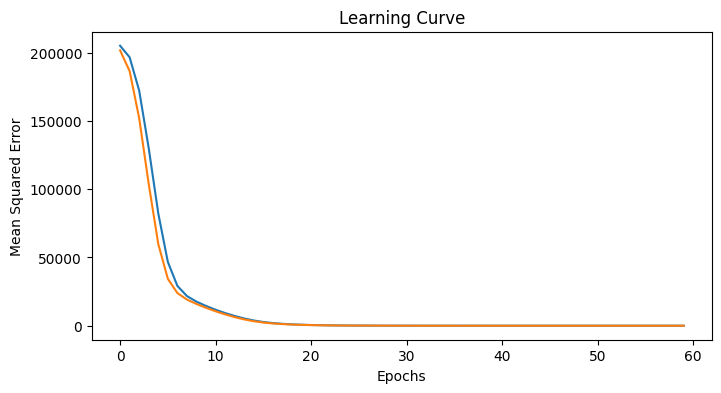

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.show()

#Model evaluation

In [30]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.2669 - mae: 3.7019


[21.442617416381836, 3.69252347946167]

In [31]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.4530 - mae: 3.7152


[22.08222007751465, 3.762396812438965]

In [32]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [33]:
ypred_test[0:5]


array([[428.47522],
       [480.4019 ],
       [481.9905 ],
       [450.56192],
       [447.66272]], dtype=float32)

In [34]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [35]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.925397515296936

In [36]:
r2_score(ytest, ypred_test)

0.9268290996551514

#Above has r2 score of 0.92 > 0.8 hence it is a good model
#Out of sample prediction

In [37]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [38]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [39]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [40]:
pred= model.predict(xnew_pre)
pred[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[445.6135 ],
       [440.61978],
       [434.77115],
       [440.69235],
       [472.591  ]], dtype=float32)

In [41]:
xnew["PE_pred"] = pred


In [42]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.613495
1,28.88,54.89,1007.16,46.60,440.619781
2,27.89,73.21,1001.32,85.88,434.771149
3,25.69,62.26,1011.38,74.08,440.692352
4,12.16,40.81,1025.79,70.97,472.591003
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,438.385468
96,11.78,39.96,1011.37,82.95,470.769562
97,5.62,41.38,1020.91,86.21,482.270966
98,24.96,74.99,1008.25,80.52,438.172180


In [43]:
xnew.to_csv("Results.csv", index=False)

#Saving the model object

In [44]:
model.save("powerplant.keras")

#Load the model

In [45]:
from keras.models import load_model
nn = load_model("/content/powerplant.keras")
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)